In [8]:
! pip install mglearn -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
from sklearn.linear_model import LinearRegression

#### Dataset

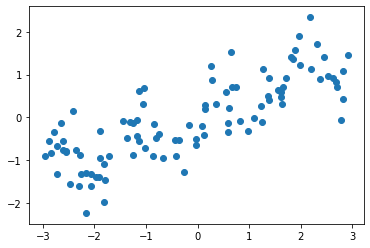

In [9]:
X, y = mglearn.datasets.make_wave(n_samples = 100)
plt.scatter(X[:, 0], y)

#### Linear Regression

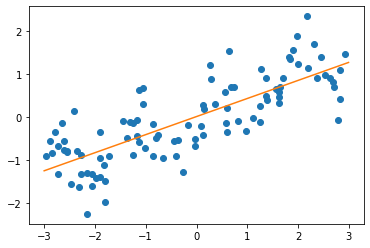

In [10]:
reg = LinearRegression().fit(X, y)
# The data ranges from -3 to 3. Lets create points 1000 points which # will be used for prediction
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_predict = reg.predict(line)
plt.plot(X[:, 0], y, 'o')
plt.plot(line, line_predict)

#### Binning

C:\Users\Anusha\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


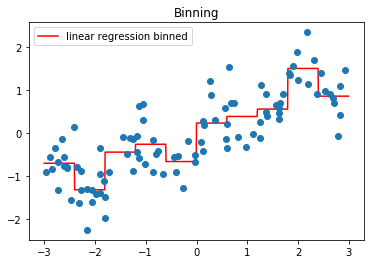

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# create 10 bins
bins = np.linspace(-3, 3, 11)
X_binned = np.digitize(X, bins = bins)
# X_binned now has values from 1 to 10
# One hot encode the data
encoder = OneHotEncoder(sparse=False)
encoder.fit(X_binned)
X_binned = encoder.transform(X_binned)
# Lets fit linear model now
reg = LinearRegression().fit(X_binned, y)
# transform the line on which model will predict
line_binned = encoder.transform(np.digitize(line, bins = bins))
#plot
plt.plot(line, reg.predict(line_binned), c = 'r', label = 'linear regression binned')
plt.plot(X[:, 0], y, 'o')
plt.title('Binning')
plt.legend(loc = 'best')

#### Polynomial linear regression

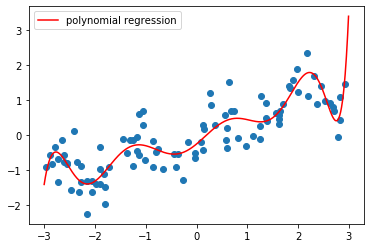

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X)
reg  = LinearRegression()
reg.fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(X[:,0], y, 'o')
plt.plot(line, reg.predict(line_poly), c = 'r', label = 'polynomial regression' )
plt.legend(loc = 'best')